<a href="https://colab.research.google.com/github/Abyy98/Week5T/blob/main/Copy_of_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [12]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
!pip install skimpy
import skimpy as skim

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [15]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv.crdownload')
print(df.head())

  School_Year  Busbreakdown_ID  Run_Type Bus_No Route_Number         Reason  \
0   2015-2016          1224901  Pre-K/EI    811            1          Other   
1   2015-2016          1225098  Pre-K/EI   9302            1  Heavy Traffic   
2   2015-2016          1215800  Pre-K/EI    358            2  Heavy Traffic   
3   2015-2016          1215511  Pre-K/EI    331            2          Other   
4   2015-2016          1215828  Pre-K/EI    332            2          Other   

  Schools_Serviced             Occurred_On              Created_On   Boro  \
0             C353  10/26/2015 08:30:00 AM  10/26/2015 08:40:00 AM  Bronx   
1             C814  10/27/2015 07:10:00 AM  10/27/2015 07:11:00 AM  Bronx   
2             C195  09/18/2015 07:36:00 AM  09/18/2015 07:38:00 AM  Bronx   
3             C178  09/17/2015 08:08:00 AM  09/17/2015 08:12:00 AM  Bronx   
4             S176  09/18/2015 07:39:00 AM  09/18/2015 07:45:00 AM  Bronx   

   ... How_Long_Delayed Number_Of_Students_On_The_Bus  \
0  ..

In [16]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,7
Bus_No,0
Route_Number,12
Reason,17
Schools_Serviced,0
Occurred_On,0
Created_On,1
Boro,627


**have** **missing** **value**

In [17]:
most_common = df['Route_Number'].mode()[0]
df['Route_Number'] = df['Route_Number'].fillna(most_common)

In [18]:
most_common = df['Run_Type'].mode()[0]
df['Run_Type'] = df['Run_Type'].fillna(most_common)

In [19]:
most_common = df['Reason'].mode()[0]
df['Reason'] = df['Reason'].fillna(most_common)

In [20]:
most_common = df['Boro'].mode()[0]
df['Boro'] = df['Boro'].fillna(most_common)

In [21]:
most_common = df['How_Long_Delayed'].mode()[0]
df['How_Long_Delayed'] = df['How_Long_Delayed'].fillna(most_common)
most_common

'20'

In [32]:

most_common = df['Number_Of_Students_On_The_Bus'].mode()[0]
df['Number_Of_Students_On_The_Bus'] = df['Number_Of_Students_On_The_Bus'].fillna(most_common)
most_common

0.0

In [22]:
most_common = df['Incident_Number'].mode()[0]
df['Incident_Number'] = df['Incident_Number'].fillna(most_common)
most_common

'2792058'

**fillin missing value using mode**

In [23]:
print(df.describe())

       Busbreakdown_ID  Number_Of_Students_On_The_Bus
count     1.812600e+04                   18125.000000
mean      1.226201e+06                       4.600055
std       1.023320e+04                      43.507729
min       1.212691e+06                       0.000000
25%       1.217399e+06                       0.000000
50%       1.227528e+06                       2.000000
75%       1.232617e+06                       5.000000
max       1.361694e+06                    1749.000000


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18126 entries, 0 to 18125
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   School_Year                      18126 non-null  object 
 1   Busbreakdown_ID                  18126 non-null  int64  
 2   Run_Type                         18126 non-null  object 
 3   Bus_No                           18126 non-null  object 
 4   Route_Number                     18126 non-null  object 
 5   Reason                           18126 non-null  object 
 6   Schools_Serviced                 18126 non-null  object 
 7   Occurred_On                      18126 non-null  object 
 8   Created_On                       18125 non-null  object 
 9   Boro                             18126 non-null  object 
 10  Bus_Company_Name                 18125 non-null  object 
 11  How_Long_Delayed                 18126 non-null  object 
 12  Number_Of_Students

 **most convert to numrical value to run model**

In [ ]:
print(df.describe())

       Busbreakdown_ID  Number_Of_Students_On_The_Bus
count     1.479720e+05                  147972.000000
mean      1.287779e+06                       3.590071
std       4.324338e+04                      55.365859
min       1.212681e+06                       0.000000
25%       1.250438e+06                       0.000000
50%       1.287844e+06                       0.000000
75%       1.325191e+06                       4.000000
max       1.362605e+06                    9007.000000


After clean data from missing value
fillin data by mode > the missing value can aple with it

In [ ]:
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,x,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,x,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,x,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,x,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,x,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,x,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,x,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,20 MINS,0,Yes,Yes,No,05/25/2017 04:30:00 PM,x,05/25/2017 04:30:07 PM,Breakdown,School-Age


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [25]:
 from sklearn import preprocessing
le = preprocessing.LabelEncoder()
 from sklearn.preprocessing import LabelEncoder

In [27]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

columns_to_encode = ['Breakdown_or_Running_Late', 'Have_You_Alerted_OPT', 'Has_Contractor_Notified_Parents', 'Has_Contractor_Notified_Schools']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

  School_Year  Busbreakdown_ID  Run_Type Bus_No Route_Number         Reason  \
0   2015-2016          1224901  Pre-K/EI    811            1          Other   
1   2015-2016          1225098  Pre-K/EI   9302            1  Heavy Traffic   
2   2015-2016          1215800  Pre-K/EI    358            2  Heavy Traffic   
3   2015-2016          1215511  Pre-K/EI    331            2          Other   
4   2015-2016          1215828  Pre-K/EI    332            2          Other   

  Schools_Serviced             Occurred_On              Created_On   Boro  \
0             C353  10/26/2015 08:30:00 AM  10/26/2015 08:40:00 AM  Bronx   
1             C814  10/27/2015 07:10:00 AM  10/27/2015 07:11:00 AM  Bronx   
2             C195  09/18/2015 07:36:00 AM  09/18/2015 07:38:00 AM  Bronx   
3             C178  09/17/2015 08:08:00 AM  09/17/2015 08:12:00 AM  Bronx   
4             S176  09/18/2015 07:39:00 AM  09/18/2015 07:45:00 AM  Bronx   

   ... How_Long_Delayed Number_Of_Students_On_The_Bus  \
0  ..

**using lable encoder for columns have 2 **

In [28]:
columns_to_encode =['School_Year', 'Run_Type', 'Bus_No', 'Route_Number',
                     'Reason', 'Schools_Serviced', 'Occurred_On',
                     'Created_On', 'Boro', 'Bus_Company_Name','How_Long_Delayed','Informed_On','Incident_Number','Last_Updated_On','School_Age_or_PreK']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   School_Year  Busbreakdown_ID  Run_Type  Bus_No  Route_Number  Reason  \
0            0          1224901         3    3887            21       6   
1            0          1225098         3    4201            21       3   
2            0          1215800         3    2516            63       3   
3            0          1215511         3    2463            63       6   
4            0          1215828         3    2466            63       6   

   Schools_Serviced  Occurred_On  Created_On  Boro  ...  How_Long_Delayed  \
0              2110         3066        3547     1  ...                77   
1              2152         3175        3657     1  ...               315   
2              2086         1384        1599     1  ...               139   
3              2085         1253        1436     1  ...                40   
4              2190         1387        1606     1  ...                77   

   Number_Of_Students_On_The_Bus  Has_Contractor_Notified_Schools  \
0                

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18126 entries, 0 to 18125
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   School_Year                      18126 non-null  int64  
 1   Busbreakdown_ID                  18126 non-null  int64  
 2   Run_Type                         18126 non-null  int64  
 3   Bus_No                           18126 non-null  int64  
 4   Route_Number                     18126 non-null  int64  
 5   Reason                           18126 non-null  int64  
 6   Schools_Serviced                 18126 non-null  int64  
 7   Occurred_On                      18126 non-null  int64  
 8   Created_On                       18126 non-null  int64  
 9   Boro                             18126 non-null  int64  
 10  Bus_Company_Name                 18126 non-null  int64  
 11  How_Long_Delayed                 18126 non-null  int64  
 12  Number_Of_Students

In [30]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
columns_to_encode = [,'School_Year', 'Run_Type', 'Bus_No', 'Route_Number',
                     'Reason', 'Schools_Serviced', 'Occurred_On',
                     'Created_On', 'Boro', 'Bus_Company_Name','How_Long_Delayed','Informed_On','Incident_Number','Last_Updated_On','School_Age_or_PreK']

encoder = OneHotEncoder(dtype = 'float',sparse_output=False, drop='first')


use onehotencoder for columns have more than 3 value

In [33]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


**have clean data now**

In [52]:
numerical_features =['Breakdown_or_Running_Late', 'Have_You_Alerted_OPT', 'Has_Contractor_Notified_Parents', 'Has_Contractor_Notified_Schools','School_Year', 'Run_Type', 'Bus_No', 'Route_Number',
                     'Reason', 'Schools_Serviced', 'Occurred_On',
                     'Created_On', 'Boro', 'Bus_Company_Name','How_Long_Delayed','Informed_On','Incident_Number','Last_Updated_On','School_Age_or_PreK']


**define numerical features to detect outlier and also do scaler**


In [46]:
def remove_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


df = remove_outliers(df)


**i have outlier then remove**

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


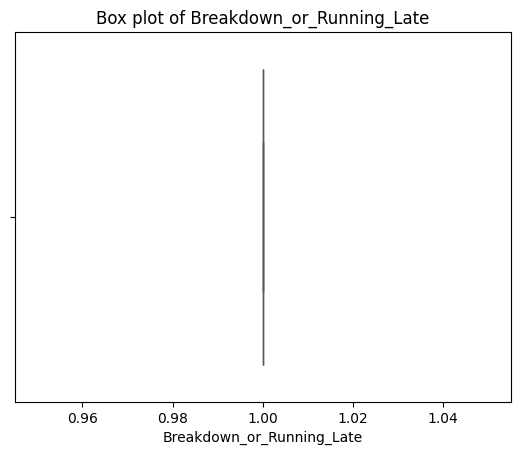

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


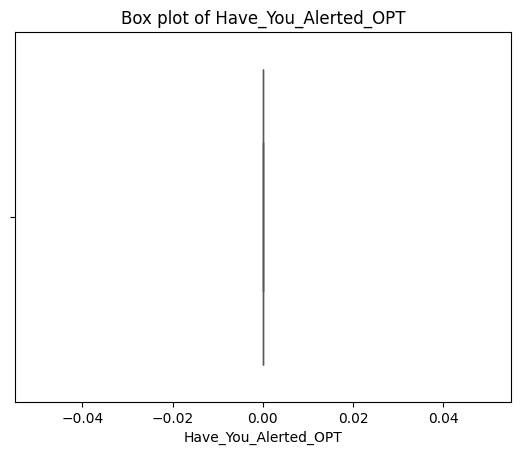

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


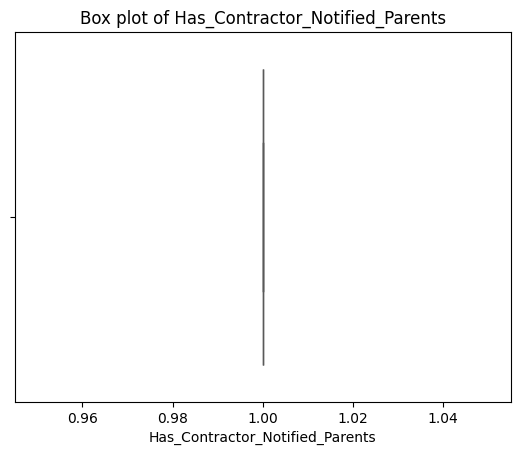

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


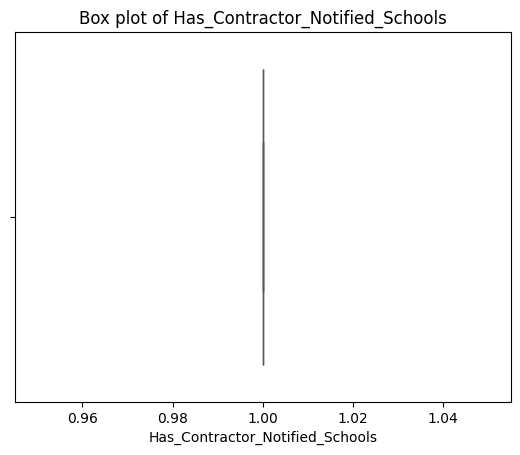

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


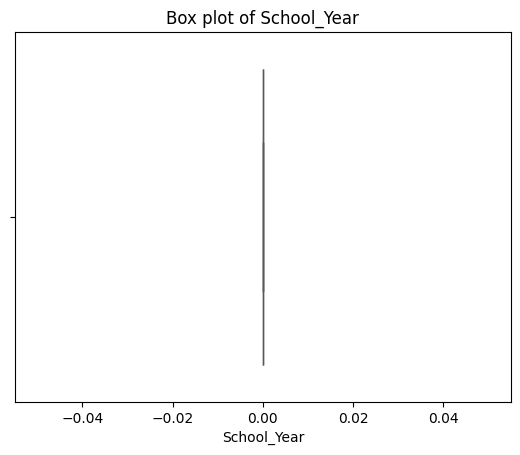

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


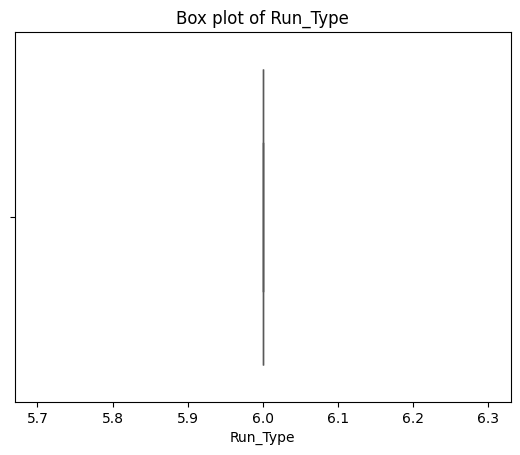

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


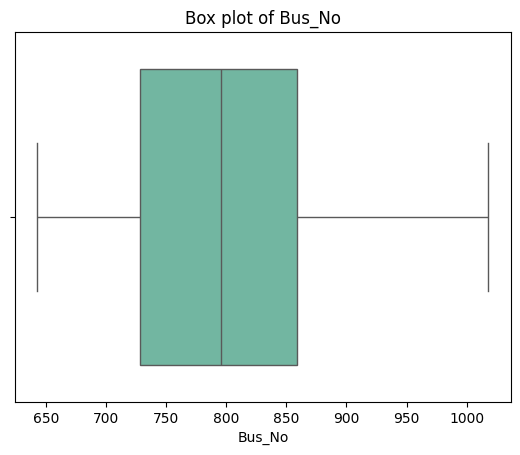

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


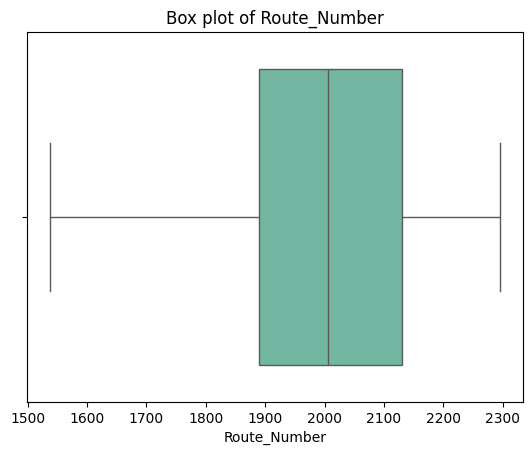

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


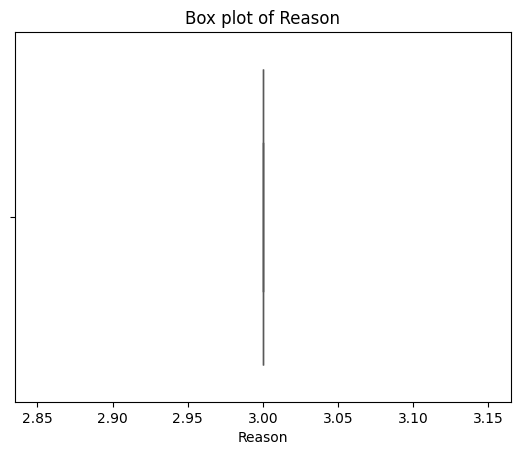

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


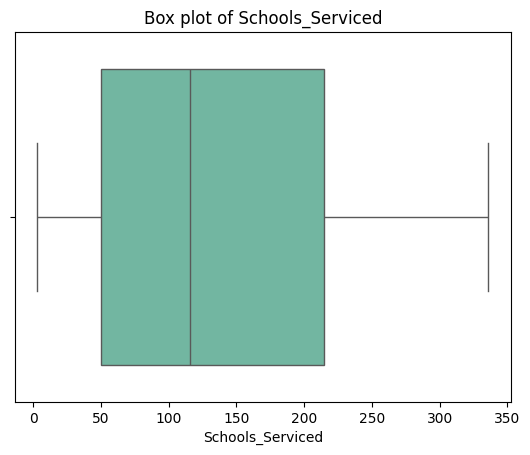

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


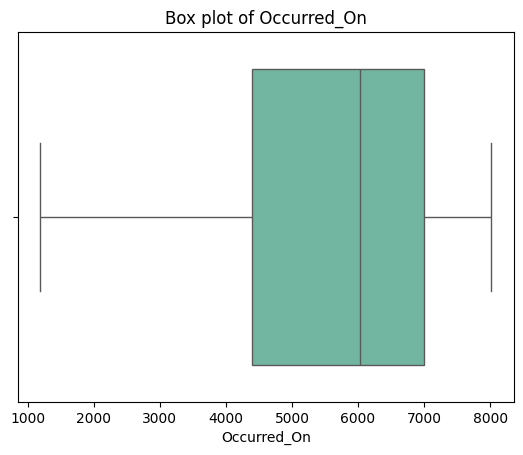

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


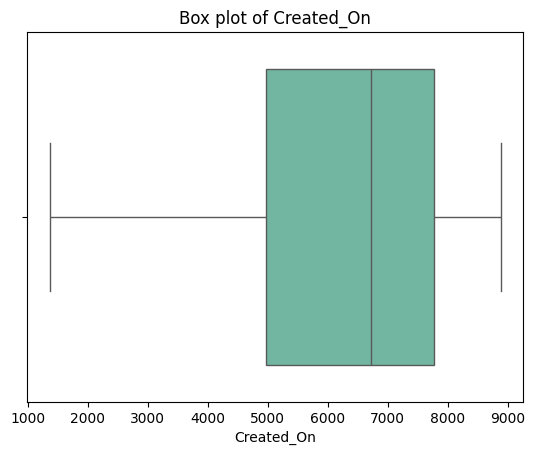

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


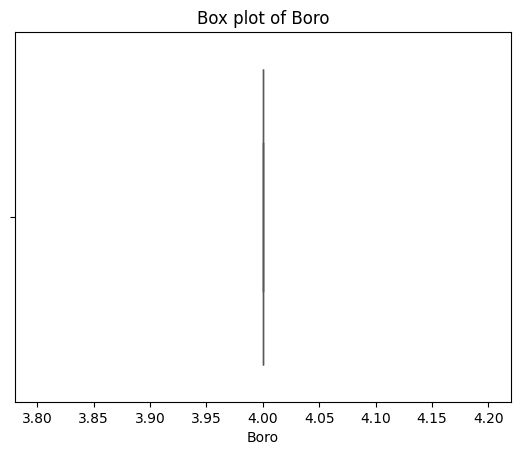

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


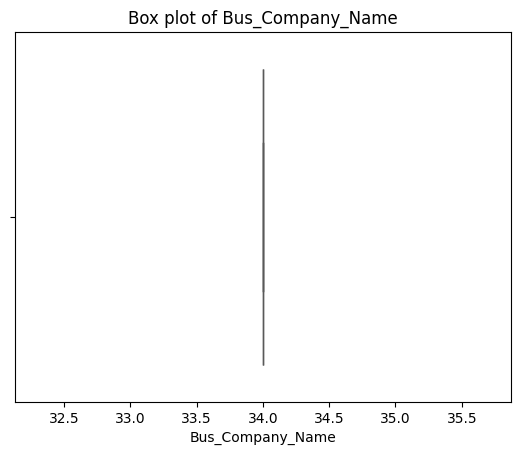

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


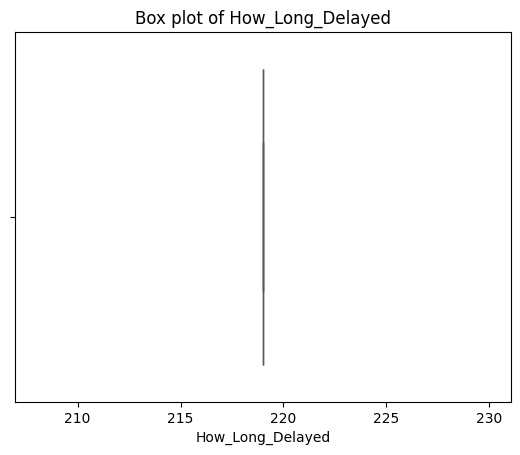

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


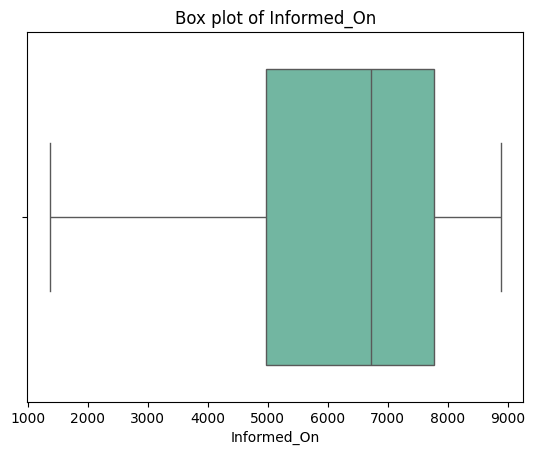

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


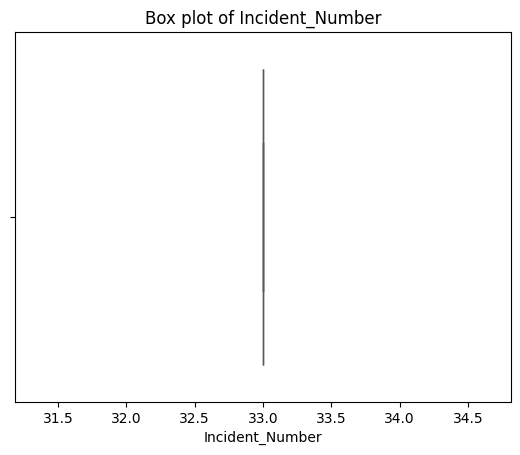

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


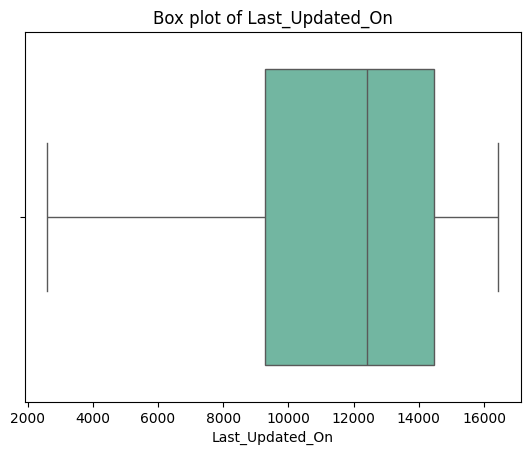

<ipython-input-53-c87b074c60d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2')


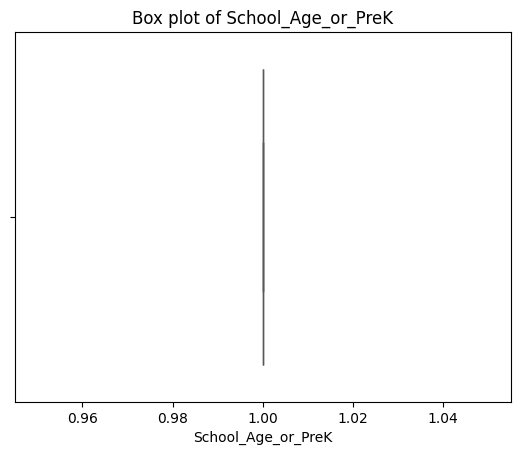

In [53]:
for feature in numerical_features:
    sns.boxplot(data=df, x=feature, palette='Set2')
    plt.title(f'Box plot of {feature}')
    plt.show()

**box plot after remove outlier**

In [48]:
for col in df.columns:
  print([col],df[col].unique())

['School_Year'] [0]
['Busbreakdown_ID'] [1226035 1225841 1226042 1225848 1226044 1224888 1225386 1226067 1225424
 1225437 1225439 1225449 1224596 1225452 1224601 1224607 1224609 1224614
 1225131 1226287 1224620 1225460 1225484 1225486 1225489 1224635 1224647
 1225497 1225503 1215279 1225505 1215284 1224665 1225506 1225509 1226312
 1224682 1225525 1224693 1224708 1224711 1224716 1224719 1224724 1215358
 1226341 1225793 1224754 1226352 1225794 1226353 1226355 1225009 1225799
 1225013 1224787 1225809 1224799 1225017 1225818 1224831 1226005 1225820
 1226651 1226654 1226672 1226676 1227035 1227055 1227068 1227085 1227094
 1227111 1227171 1227368 1227370 1227377 1227383 1227391 1227403 1227406
 1227407 1227409 1227411 1227418 1227433 1227493 1227519 1227547 1227551
 1227693 1227721 1227723 1227725 1227728 1227813 1227847 1227873 1227881
 1228016 1228035 1228041 1228048 1228056 1228061 1228069 1228091 1228100
 1228104 1228134 1228149 1228213 1228381 1228386 1228389 1228398 1228425
 1228653 12

**here can show eche columns what contain**

In [49]:
!pip install skimpy
from skimpy import skim

In [50]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 385    │ │ int64       │ 20    │                                                          │
│ │ Number of columns │ 21     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA ┃ NA % ┃ mean    ┃ sd    ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ School_Year       │  0 │    0 │       0 │     0 │       0 │       0 │       0 │       0 │       0 │     ▇  │  │
│ │ Busbreakdown_ID   │  0 │    0 │ 1231000 │  3605 │ 1215000 │ 1228000 │ 1231000 │ 1234000 │ 1236000 │   ▂▅▆▇ │  │
│ │ Run_Type          │  0 │    0 │       6 │     0 │       6 │       6 │       6 │       6 │       6 │     ▇  │  │
│ │ Bus_No            │  0 │    0 │   795.8 │ 73.88 │     643 │     728 │     796 │     859 │    1018 │ ▃▆▆▇▂  │  │
│ │ Route_Number      │  0 │    0 │    2001 │ 188.7 │    1537 │    1890 │    2005 │    2130 │    2296 │  ▃▁▇▃▅ │  │
│ │ Reason            │  0 │    0 │       3 │     0 │       3 │       3 │       3 │       3 │       3 │     ▇  │  │
│ │ Schools_Serviced  │  0 │    0 │   145.6 │ 100.3 │       3 │      50 │     116 │     215 │     336 │ ▇▇▃▇▂▅ │  │
│ │ Occurred_On       │  0 │    0 │    5696 │  1540 │    1195 │    4395 │    6034 │    6994 │    8017 │  ▃▅▅▇▇ │  │
│ │ Created_On        │  0 │    0 │    6371 │  1663 │    1369 │    4973 │    6719 │    7772 │    8879 │  ▂▅▅▆▇ │  │
│ │ Boro              │  0 │    0 │       4 │     0 │       4 │       4 │       4 │       4 │       4 │     ▇  │  │
│ │ Bus_Company_Name  │  0 │    0 │      34 │     0 │      34 │      34 │      34 │      34 │      34 │     ▇  │  │
│ │ How_Long_Delayed  │  0 │    0 │     219 │     0 │     219 │     219 │     219 │     219 │     219 │     ▇  │  │
│ │ Number_Of_Student │  0 │    0 │       3 │     0 │       3 │       3 │       3 │       3 │       3 │     ▇  │  │
│ │ s_On_The_Bus      │    │      │         │       │         │         │         │         │         │        │  │
│ │ Has_Contractor_No │  0 │    0 │       1 │     0 │       1 │       1 │       1 │       1 │       1 │     ▇  │  │
│ │ tified_Schools    │    │      │         │       │         │         │         │         │         │        │  │
│ │ Has_Contractor_No │  0 │    0 │       1 │     0 │       1 │       1 │       1 │       1 │       1 │     ▇  │  │
│ │ tified_Parents    │    │      │         │       │         │         │         │         │         │        │  │
│ │ Have_You_Alerted_ │  0 │    0 │       0 │     0 │       0 │       0 │       0 │       0 │       0 │     ▇  │  │
│ │ OPT               │    │      │         │       │         │         │         │         │         │        │  │
│ │ Informed_On       │  0 │    0 │    6371 │  1663 │    1369 │    4973 │    6719 │    7772 │    8879 │  ▂▅▅▆▇ │  │
│ │ Incident_Number   │  0 │    0 │      33 │     0 │      33 │      33 │      33 │      33 │      33 │     ▇  │  │
│ │ Last_Updated_On   │  0 │    0 │   11850 │  3065 │   

**also do this to show Summary dataset**

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [57]:
from sklearn.model_selection import train_test_split

X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Training set size: (215, 20)
Validation set size: (54, 20)
Test set size: (116, 20)


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Flatten, Dense, Dropout

In [61]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
      Flatten(),
    Dense(512, activation='relu'),
     Dropout(0.5),
    Dense(1, activation='sigmoid')])

here define Dropout to reduse overfiting and make the learning more petter
كل ما زدت هيدن لاير كان الاداء افضل ايضًا اقدر استعمل shuffling لتقليل الاوفرفتنق بس شفت اداء المودل فماكان يحتاج اعملها   

In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,833 (81.38 KB)

 Trainable params: 20,833 (81.38 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [62]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [64]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 454ms/step - accuracy: 0.6989 - loss: 5757.9214 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [65]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Loss: 0.0000
Test Accuracy: 1.0000


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [70]:
prediction = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

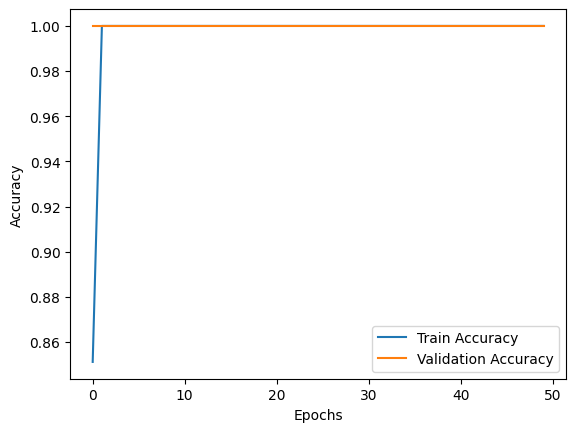

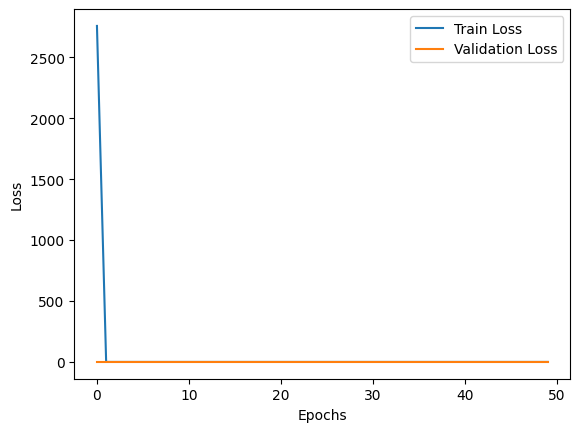

In [67]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
history.save('model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

anser some Q after cell


3- choose 50 to make the model learnd more

Regularization Techniques: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.

do dropout to make accurecy good before using i git acuur 79 and then add dropout git accur 89 then 98 and like this